<h1>Geospatial Analysis and Visualization of Nepal Geo-data</h1>

The credits for fantastic learning materials go to:
<br>
 GISHub https://www.youtube.com/@thegishub
 <br>
 GeoDev https://www.youtube.com/@geodev 

In [5]:
import pandas as pd, geopandas as geon

In [6]:
json_path = r'C:\\Users\\X\Desktop\basically all\Spatial Analysis\\geoData\\municipality.json'
shp_path = r'C:\\Users\\X\Desktop\basically all\Spatial Analysis\\geoData\\municipality.shp'

In [7]:
df = geon.read_file(json_path)

In [8]:
df.head(3)

,OBJECTID,DISTRICT,GaPa_NaPa,Type_GN,Province,SCode,DCode,SDD,MCode,length,area,SDDMM,Nepali,Shape_Leng,Shape_Area,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,1,1,101,1,44.672747,88.825948,10101,आठराई त्रिवेणी,0.430900,0.008075,"POLYGON ((87.62191 27.36245, 87.62137 27.36272..."
1,2,TAPLEJUNG,Maiwakhola,Gaunpalika,1,1,1,101,2,61.067429,137.848122,10102,मैवाखोला,0.577692,0.012540,"POLYGON ((87.60599 27.37125, 87.60364 27.37219..."
2,3,TAPLEJUNG,Meringden,Gaunpalika,1,1,1,101,3,75.987469,210.313039,10103,मेरिङदेन,0.718499,0.019148,"POLYGON ((87.62728 27.37689, 87.62691 27.37773..."


In [9]:
len(df)

774

In [10]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
df.geom_type

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
769    Polygon
770    Polygon
771    Polygon
772    Polygon
773    Polygon
Length: 774, dtype: object

<Axes: >

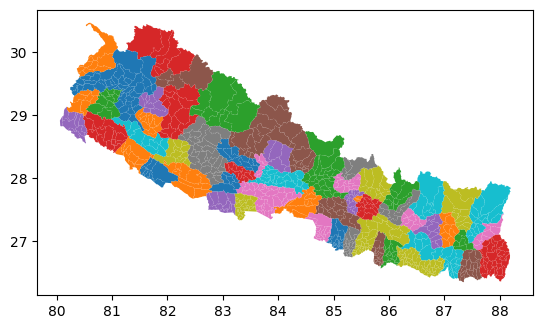

In [14]:
df.plot('DISTRICT')

<Axes: >

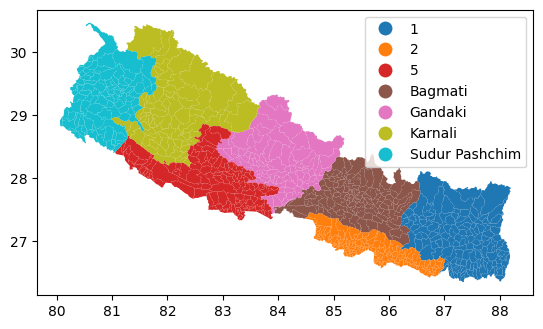

In [15]:
df.plot('Province', legend=True)

<h2>Extracting data with matplotlib</h2>

In [16]:
import matplotlib.pyplot as plt

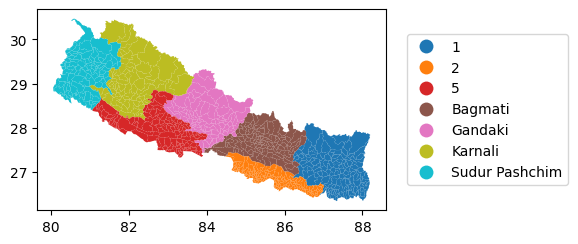

In [20]:
fig, ax = plt.subplots(1, figsize=(4.5, 10))
df.plot(ax=ax, column='Province', legend=True, legend_kwds={'loc': 'center left'})
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.04, 0.5))

<h2>Image processing using rasterio</h2>

In [25]:
df.to_file(r'/outputs/Nepal_administrative_divisions_shp.shp')

In [26]:
df.to_file(r'/outputs/Nepal_administrative_divisions_geojson.geojson', driver='GeoJSON', encoding='utf-8')

In [27]:
import rasterio

In [28]:
image_path = r'./tifData/nepal_lc_2020.tif'
ds = rasterio.open(image_path)

In [29]:
ds

<open DatasetReader name='./tifData/nepal_lc_2020.tif' mode='r'>

In [30]:
data = ds.read()

In [31]:
data

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

In [32]:
ds.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 2932,
 'height': 1485,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0027777777777780012, 0.0, 80.05847091000004,
        0.0, -0.0027777777777780012, 30.472819010000357)}

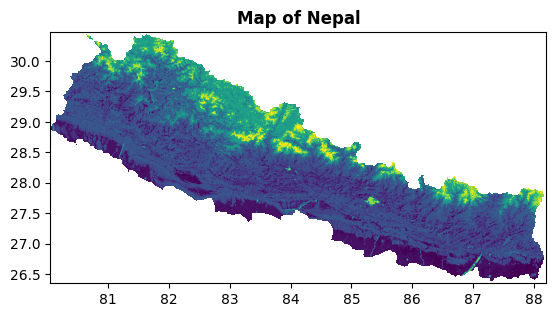

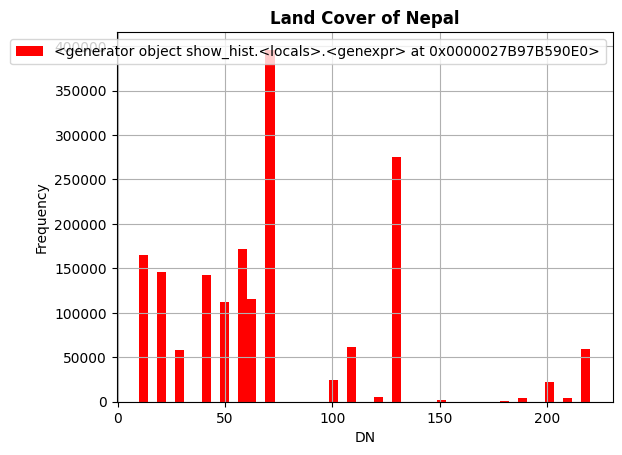

In [39]:
from rasterio.plot import show, show_hist

show(ds, title='Map of Nepal')
show_hist(ds, bins=50, title='Land Cover of Nepal')

In [44]:
with rasterio.open(r'./tifData/nepal_lc_2020_modified.tif',
                   'w+',
                   driver=ds.driver,
                   height = ds.height,
                   width = ds.width,
                   count = ds.count,
                   crs = ds.crs,
                   transform = ds.transform,
                   dtype = data.dtype
                   ) as f:
    f.write(data)

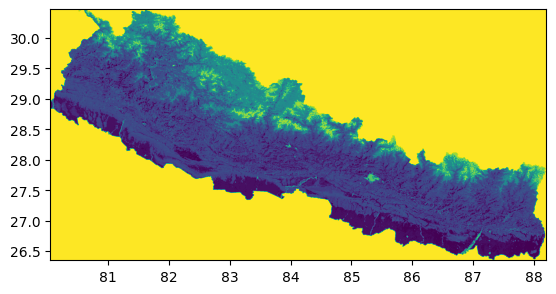

<Axes: >

In [46]:
ds_mod = rasterio.open(r'./tifData/nepal_lc_2020_modified.tif')
show(ds_mod)

<h2>Data classification with NumPy</h2>

In [47]:
data.max()

255

In [48]:
data.min()

10

In [49]:
import numpy as np

In [50]:
list = data.copy()

In [ ]:
list[np.where((list >=10) & (list <= 40))] = 1
list[np.where((list >=50) & (list <= 100))] = 2
list[np.where((list >=110) & (list <= 180))] = 3
list[np.where(list >=190)] = 4
list[np.where(list >=200)] = 5
list[np.where((list >=210) & (list <= 200))] = 6